In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import precision_score, recall_score

from astropy.table import Table
from sklearn import metrics

df = pd.read_csv('student-por.csv')
dfv = pd.read_csv('student-por.csv')

Attribute Information:


Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [2]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
# mapping strings to numeric values:
def string_2_numerical():
    df['school'] = df['school'].map({'GP': 0, 'MS': 1})
    df['sex'] = df['sex'].map({'M': 0, 'F': 1})
    df['address'] = df['address'].map({'U': 0, 'R': 1})
    df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
    df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
    df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
    df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
    df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
    df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})

In [4]:
string_2_numerical()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


In [5]:
df["Result"] = pd.NaT
for i in range(len(df["Result"])):
    if df["G3"][i]>9:
        df["Result"][i]=1
    else:
        df["Result"][i]=0

C:\Users\banoth jawaharlal\AppData\Local\Temp\ipykernel_14360\2143309237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"][i]=1


In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Result
0,0,1,18,0,1,1,4,4,3,0,...,3,4,1,1,3,4,0,11,11,1
1,0,1,17,0,1,0,1,1,3,4,...,3,3,1,1,3,2,9,11,11,1
2,0,1,15,0,0,0,1,1,3,4,...,3,2,2,3,3,6,12,13,12,1
3,0,1,15,0,1,0,4,2,1,2,...,2,2,1,1,5,0,14,14,14,1
4,0,1,16,0,1,0,3,3,4,4,...,3,2,1,2,5,0,11,13,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,4,2,1,2,5,4,10,11,10,1
645,1,1,18,0,0,0,3,1,0,2,...,3,4,1,1,1,4,15,15,16,1
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,5,6,11,12,9,0
647,1,0,17,0,0,0,3,1,2,2,...,4,5,3,4,2,6,10,10,10,1


In [7]:
feature_names=df.columns
n=len(feature_names)
feature_names=feature_names[:n-2]

In [8]:
# split data train 60 % and test 40 %

data = df.to_numpy()
n = data.shape[1]
x = data[:,0:n-2]
y = data[:,n-1]
y=y.astype("int")
x=x.astype("int")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [9]:
y_train=y_train.astype("int")
y_test=y_test.astype("int")
x_train=x_train.astype("int")
x_test=x_test.astype("int")

#                               LogisticRegression Implementation

C:\Users\banoth jawaharlal\anaconda3\ana\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Accuracy test is:  0.9230769230769231
#Accuracy train is:  0.961439588688946

*Accuracy is: 92.3076923076923
*f1 score is:  85.52177302594944
Precision: 0.946
Recall: 0.963


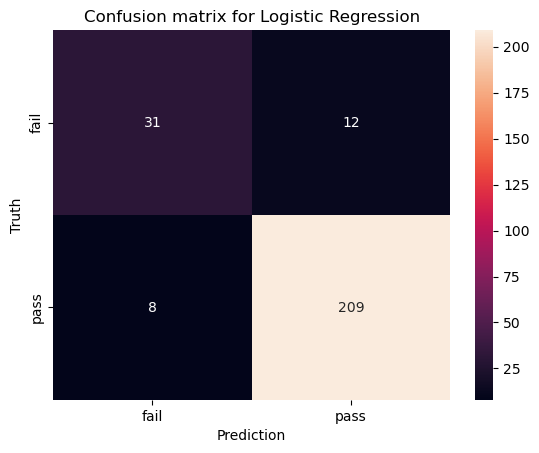

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        43
           1       0.95      0.96      0.95       217

    accuracy                           0.92       260
   macro avg       0.87      0.84      0.86       260
weighted avg       0.92      0.92      0.92       260



In [10]:
def LogisticRegression_fun(x_train, y_train, x_test, y_test):
    logisticRegr = LogisticRegression()
    logisticRegr.fit(x_train,y_train)
    y_pred=logisticRegr.predict(x_test)
    yt_lrg,yp_lrg = y_test,y_pred

    Sctest=logisticRegr.score(x_test,y_test)
    Sctrain=logisticRegr.score(x_train,y_train)

    print('#Accuracy test is: ',Sctest)
    print('#Accuracy train is: ',Sctrain)

    f1 = f1_score(y_test, y_pred, average='macro')*100
    accuracy = accuracy_score(y_test, y_pred)*100
    print('\n*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)
    precision = precision_score(y_test, y_pred, average='binary')
    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)

    cm = confusion_matrix(y_test, y_pred)
    ax = plt.axes()
    sns.heatmap(cm,ax=ax,annot=True,fmt="d",xticklabels=['fail','pass'], yticklabels=['fail','pass'])
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.title('Confusion matrix for Logistic Regression')
    plt.show()
    print(classification_report(y_test,y_pred))
    return yt_lrg, yp_lrg

#Logistic Regression implementation
yt_lrg, yp_lrg = LogisticRegression_fun(x_train,y_train,x_test,y_test)

#                                            K_Nearest Neighbours

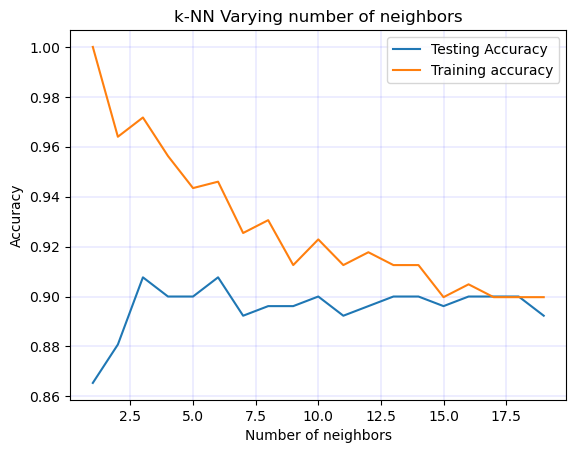

k= 3
*Accuracy is: 90.76923076923077
*f1 score is:  82.27272727272728
Precision: 0.933
Recall: 0.959


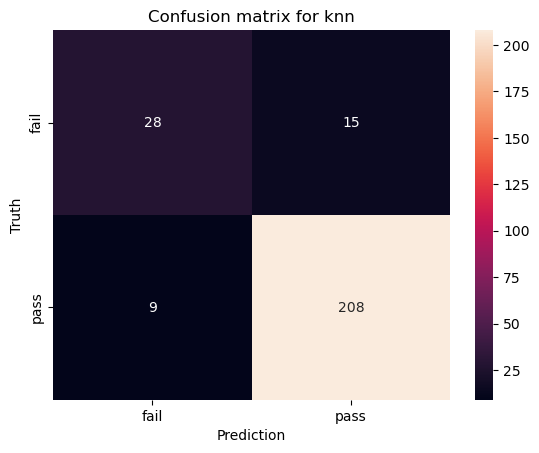

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        43
           1       0.93      0.96      0.95       217

    accuracy                           0.91       260
   macro avg       0.84      0.80      0.82       260
weighted avg       0.90      0.91      0.90       260



In [11]:
def  kNearestNeighbours_fun(x_train,y_train,x_test,y_test):
    KNN= KNeighborsClassifier()

    neighbors= np.arange(1,20)
    train_accuracy =np.empty(19)
    test_accuracy = np.empty(19)

    for i,k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        train_accuracy[i] = knn.score(x_train, y_train)
        test_accuracy[i] = knn.score(x_test, y_test) 

    #  Plotting the curv
    plt.title('k-NN Varying number of neighbors')
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training accuracy')
    plt.legend()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.show() 

    n=0
    for i in range(len(test_accuracy)):
        if test_accuracy[n]<test_accuracy[i]:
            n=i
    print("k=",n+1)

    KNN_f= KNeighborsClassifier(n_neighbors=n+1)
    KNN_f.fit(x_train,y_train)
    y_pred=KNN_f.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='macro')*100
    accuracy = accuracy_score(y_test, y_pred)*100
    print('*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)
    precision = precision_score(y_test, y_pred, average='binary')
    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)

    yt_knn,yp_knn= y_test,y_pred

    cm = confusion_matrix(y_test, y_pred)
    ax = plt.axes()
    sns.heatmap(cm,ax=ax,annot=True,fmt="d",xticklabels=['fail','pass'], yticklabels=['fail','pass'])
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.title('Confusion matrix for knn')
    plt.show()
    print(classification_report(y_test,y_pred))
    return yt_knn,yp_knn

#k-Nearest Neighbours
yt_knn,yp_knn = kNearestNeighbours_fun(x_train,y_train,x_test,y_test)

#                                           Support Vector machine

*Accuracy is: 91.53846153846153
*f1 score is:  84.67474011359982
Precision: 0.949
Recall: 0.949


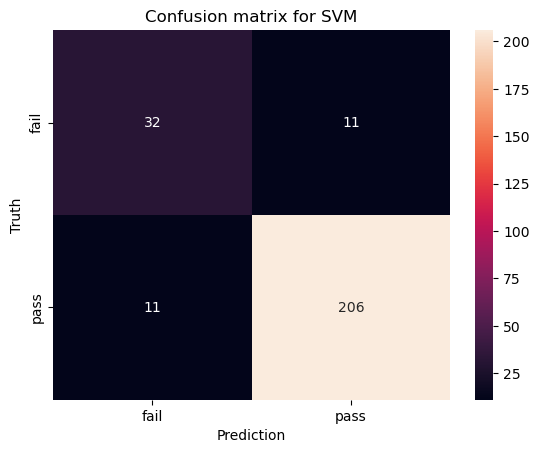

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.95      0.95      0.95       217

    accuracy                           0.92       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.92      0.92      0.92       260



In [12]:
def  SupportVectorMachine_fun(x_train,y_train,x_test,y_test):
    cls=svm.SVC(kernel="linear")
    cls.fit(x_train,y_train)
    y_pred=cls.predict(x_test)

    f1 = f1_score(y_test, y_pred, average='macro')*100
    accuracy = accuracy_score(y_test, y_pred)*100
    print('*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)
    precision = precision_score(y_test, y_pred, average='binary')
    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)

    yt_svm,yp_svm= y_test,y_pred

    cm = confusion_matrix(y_test, y_pred)
    ax = plt.axes()
    sns.heatmap(cm,ax=ax,annot=True,fmt="d",xticklabels=['fail','pass'], yticklabels=['fail','pass'])
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.title('Confusion matrix for SVM')
    plt.show()
    print(classification_report(y_test,y_pred))
    return yt_svm,yp_svm

#Support vector machine
yt_svm,yp_svm = SupportVectorMachine_fun(x_train,y_train,x_test,y_test) 

#                                              RandomForestclassifier

max_depth= 10 
random_state= 15
*Accuracy is: 93.84615384615384
*f1 score is:  88.41741842075955
Precision: 0.955
Recall: 0.972


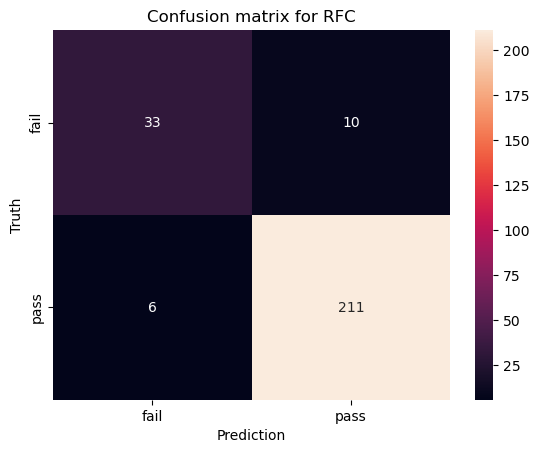

              precision    recall  f1-score   support

           0       0.85      0.77      0.80        43
           1       0.95      0.97      0.96       217

    accuracy                           0.94       260
   macro avg       0.90      0.87      0.88       260
weighted avg       0.94      0.94      0.94       260



In [13]:
def RandomForestClassifier_fun(x_train,y_train,x_test,y_test):
    
    acc=np.zeros((15,15))
    f1s=np.zeros((15,15))
    for i in range(15):
        for j in range(15):
            RFC_m = RFC(max_depth=i+1, random_state=j+1)  
            RFC_m.fit(x_train,y_train)  
            y_pred=RFC_m.predict(x_test)
  
        f1s[i][j] = round(f1_score(y_test, y_pred, average='macro'),3)
        acc[i][j] = round(accuracy_score(y_test, y_pred)*100,3)
    
              
    m=0
    n=0
    for i in range(15):
        for j in range(15):
            if acc[m][n]<acc[i][j]:
                    m=i
                    n=j
            elif acc[m][n]==acc[i][j] and f1s[m][n]<f1s[i][j]:
                    m=i
                    n=j
    
    print("max_depth=",m+1,"\nrandom_state=",n+1)

    RFC_m = RFC(max_depth=m+1, random_state=n+1)  
    RFC_m.fit(x_train,y_train)  
    y_pred=RFC_m.predict(x_test)

    f1 = f1_score(y_test, y_pred, average='macro')*100
    accuracy = accuracy_score(y_test, y_pred)*100
    print('*Accuracy is: '+str(accuracy)+'\n*f1 score is: ',f1)
    precision = precision_score(y_test, y_pred, average='binary')
    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)

    yt_rfc,yp_rfc= y_test,y_pred

    cm = confusion_matrix(y_test, y_pred)
    ax = plt.axes()
    sns.heatmap(cm,ax=ax,annot=True,fmt="d",xticklabels=['fail','pass'], yticklabels=['fail','pass'])
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    plt.title('Confusion matrix for RFC')
    plt.show()
    print(classification_report(y_test,y_pred))
    return yt_rfc,yp_rfc

#Random Forest Classifier
yt_rfc,yp_rfc = RandomForestClassifier_fun(x_train,y_train,x_test,y_test)


#                                  BorytaPy function implementation

In [14]:


RFC_m = RFC(max_depth=13, random_state=13)  
RFC_m.fit(x_train,y_train)  

feat_selector = BorutaPy(RFC_m, n_estimators='auto', verbose=2, random_state=0)

feat_selector.fit(x_train, y_train)


print(feat_selector.support_)

print(feat_selector.ranking_) 

X_filtered = feat_selector.transform(x_train);  

feature_ranks = list(zip(feature_names, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]));

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	32
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	24
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	24
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	24
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	5
Rejected: 	24
Iteration: 	12 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	3
Tentative: 	3
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	27
I

In [15]:
ndf = df[["failures","G1","G2","G3","Result"]]
ndf

,failures,G1,G2,G3,Result
0,0,0,11,11,1
1,0,9,11,11,1
2,0,12,13,12,1
3,0,14,14,14,1
4,0,11,13,13,1
...,...,...,...,...,...
644,1,10,11,10,1
645,0,15,15,16,1
646,0,11,12,9,0
647,0,10,10,10,1


In [16]:
feature_names_fs=ndf.columns
n=len(feature_names_fs)
feature_names_fs=feature_names_fs[:n-2]

In [17]:
data_fs = ndf.to_numpy()
n = data_fs.shape[1]
x_fs = data_fs[:,0:n-2]
y_fs = data_fs[:,n-1]
y_fs=y_fs.astype("int")
x_fs=x_fs.astype("int")
x_train_fs,x_test_fs,y_train_fs,y_test_fs = train_test_split(x_fs,y_fs,test_size=0.4,random_state=13)


y_train_fs=y_train_fs.astype("int")
y_test_fs=y_test_fs.astype("int")
x_train_fs=x_train_fs.astype("int")
x_test_fs=x_test_fs.astype("int")

#Accuracy test is:  0.9461538461538461
#Accuracy train is:  0.9203084832904884

*Accuracy is: 94.61538461538461
*f1 score is:  88.71527777777777
Precision: 0.964
Recall: 0.973


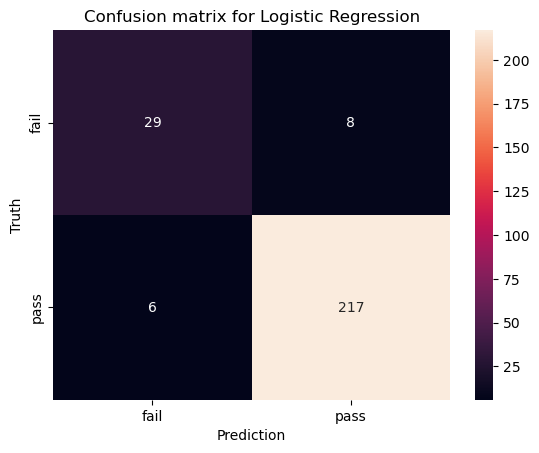

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        37
           1       0.96      0.97      0.97       223

    accuracy                           0.95       260
   macro avg       0.90      0.88      0.89       260
weighted avg       0.95      0.95      0.95       260



In [28]:
yt_lrg_fs, yp_lrg_fs = LogisticRegression_fun(x_train_fs,y_train_fs,x_test_fs,y_test_fs)

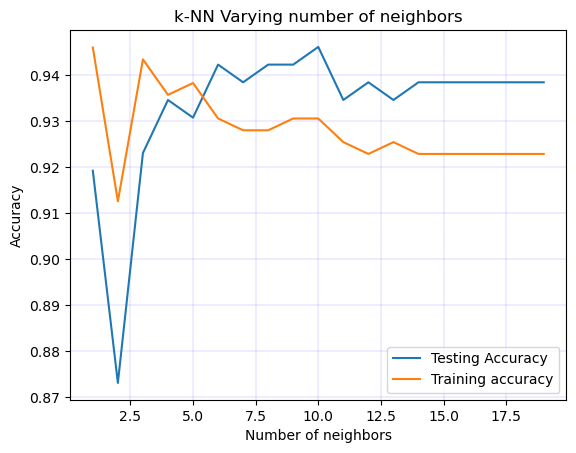

k= 10
*Accuracy is: 94.61538461538461
*f1 score is:  88.44444444444446
Precision: 0.960
Recall: 0.978


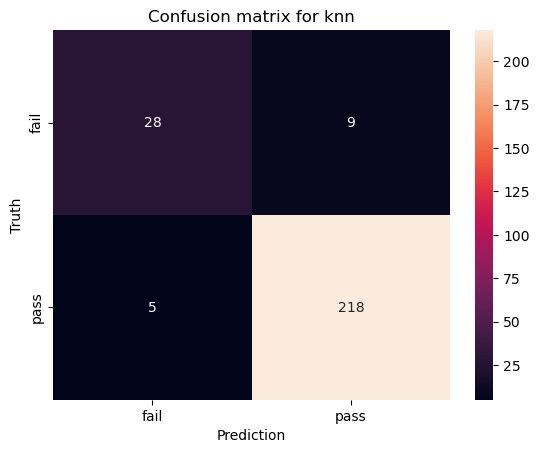

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        37
           1       0.96      0.98      0.97       223

    accuracy                           0.95       260
   macro avg       0.90      0.87      0.88       260
weighted avg       0.94      0.95      0.94       260



In [29]:

yt_knn_fs,yp_knn_fs = kNearestNeighbours_fun(x_train_fs,y_train_fs,x_test_fs,y_test_fs)

*Accuracy is: 94.23076923076923
*f1 score is:  87.4674636074424
Precision: 0.956
Recall: 0.978


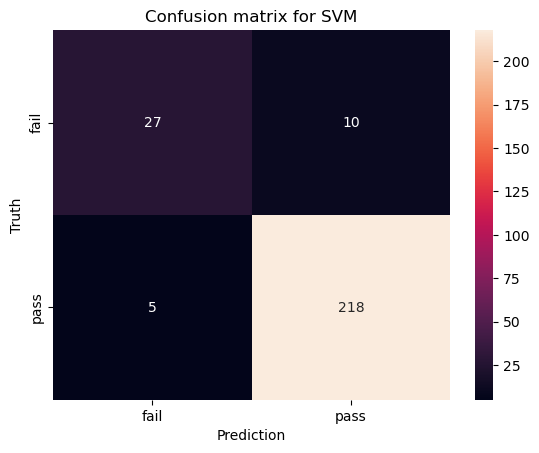

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.96      0.98      0.97       223

    accuracy                           0.94       260
   macro avg       0.90      0.85      0.87       260
weighted avg       0.94      0.94      0.94       260



In [30]:

yt_svm_fs,yp_svm_fs = SupportVectorMachine_fun(x_train_fs,y_train_fs,x_test_fs,y_test_fs)

max_depth= 3 
random_state= 15
*Accuracy is: 93.84615384615384
*f1 score is:  85.35004930271869
Precision: 0.940
Recall: 0.991


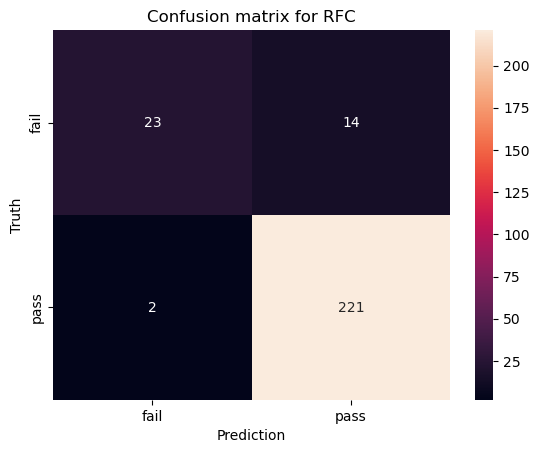

              precision    recall  f1-score   support

           0       0.92      0.62      0.74        37
           1       0.94      0.99      0.97       223

    accuracy                           0.94       260
   macro avg       0.93      0.81      0.85       260
weighted avg       0.94      0.94      0.93       260



In [31]:

yt_rfc_fs,yp_rfc_fs = RandomForestClassifier_fun(x_train_fs,y_train_fs,x_test_fs,y_test_fs)

In [32]:
# Function to compare the three classifiers (Logistic regression, KNN and SVM) performances :

def compare_lrg_knn_svm_rfc(yt_knn,yp_knn,yt_lrg,yp_lrg,yt_svm,yp_svm,yt_rfc,yp_rfc):
    #F1 score
    f1_lrg = round(f1_score(yt_lrg, yp_lrg, average='macro')*100,3)
    f1_knn = round(f1_score(yt_knn, yp_knn, average='macro')*100,3)
    f1_svm = round(f1_score(yt_svm, yp_svm, average='macro')*100,3)
    f1_rfc = round(f1_score(yt_rfc, yp_rfc, average='macro')*100,3)
    f1_all = [f1_lrg,f1_knn,f1_svm,f1_rfc]
    
    #Accuracy score
    acc_lrg = round(accuracy_score(yt_lrg, yp_lrg)*100,3)
    acc_knn = round(accuracy_score(yt_knn, yp_knn)*100,3)
    acc_svm = round(accuracy_score(yt_svm, yp_svm)*100,3)
    acc_rfc = round(accuracy_score(yt_rfc, yp_rfc)*100,3)
    acc_all=[acc_lrg,acc_knn,acc_svm,acc_rfc]
    
    #Confusion matrix
    conf_lrg = confusion_matrix(yt_lrg, yp_lrg)
    conf_knn = confusion_matrix(yt_knn, yp_knn)
    conf_svm = confusion_matrix(yt_svm, yp_svm)
    conf_rfc = confusion_matrix(yt_svm, yp_rfc)
    
    
    
    # Table of metrics
    print('************************* Table of metrics **************************\n')
    data_rows = [('f1 score',f1_lrg,f1_knn,f1_svm,f1_rfc),
                 ('','','','',''),
                  ('accuracy %',acc_lrg,acc_knn,acc_svm,acc_rfc),
                 ('','','','',''),
                 ('confusion matrix',conf_lrg[0], conf_knn[0], conf_svm[0],conf_rfc[0]),
                ('',conf_lrg[1], conf_knn[1], conf_svm[1], conf_rfc[1])]
    t = Table(rows=data_rows, names=('metric','Logistic regression', 'KNN', 'SVM', 'RFC'))
    print(t)
    
    
    # Maximum metrics
    print('\n\n************************* Max of metrics **************************\n')
    data_rows = [('max f1 score',algo_with_max_metric(f1_lrg,f1_knn,f1_svm,f1_rfc)),
                 ('','','','',''),
                  ('max accuracy %',algo_with_max_metric(acc_lrg,acc_knn,acc_svm,acc_rfc))]
    t = Table(rows=data_rows, names=('metric','Learning algorithm winnig'))
    print(t)
    return acc_all,f1_all
    
# Function returning name of winnig algorithm based on a single metric
def algo_with_max_metric(a,b,c,d):
    max_metric = max(a,b,c,d)
    if max_metric == a:
        return 'Logistic regression'
    elif max_metric == b:
        return 'KNN'
    elif max_metric == c:
        return 'SVM'
    else:
        return 'RFC'

In [33]:
acc_all,f1_all=compare_lrg_knn_svm_rfc(yt_knn,yp_knn,yt_lrg,yp_lrg,yt_svm,yp_svm,yt_rfc,yp_rfc)

************************* Table of metrics **************************

     metric      Logistic regression    KNN       SVM       RFC   
---------------- ------------------- --------- --------- ---------
        f1 score              85.522    82.273    84.675    88.417
                                                                  
      accuracy %              92.308    90.769    91.538    93.846
                                                                  
confusion matrix             [31 12]   [28 15]   [32 11]   [33 10]
                           [  8 209] [  9 208] [ 11 206] [  6 211]


************************* Max of metrics **************************

    metric     Learning algorithm winnig
-------------- -------------------------
  max f1 score                       RFC
                                        
max accuracy %                       RFC


In [34]:
acc_all_fs,f1_all_fs=compare_lrg_knn_svm_rfc(yt_knn_fs,yp_knn_fs,yt_lrg_fs,yp_lrg_fs,yt_svm_fs,yp_svm_fs,yt_rfc_fs,yp_rfc_fs)


************************* Table of metrics **************************

     metric      Logistic regression    KNN       SVM       RFC   
---------------- ------------------- --------- --------- ---------
        f1 score              88.715    88.444    87.467     85.35
                                                                  
      accuracy %              94.615    94.615    94.231    93.846
                                                                  
confusion matrix             [29  8]   [28  9]   [27 10]   [23 14]
                           [  6 217] [  5 218] [  5 218] [  2 221]


************************* Max of metrics **************************

    metric     Learning algorithm winnig
-------------- -------------------------
  max f1 score       Logistic regression
                                        
max accuracy %       Logistic regression


In [35]:
def compareplot(val1,val2,label1,label2):
    w=0.3
    x=["LRG","KNN","SVM","RFC"]

    bar1=np.arange(len(x))
    bar2=[i+w for i in bar1]

    plt.bar(bar1,val1,w,label=label1)
    plt.bar(bar2,val2,w,label=label2)

    for i in range(len(x)):
        plt.text(i,val1[i],round(val1[i],2),ha="center",va="bottom")
        plt.text(i+w,val2[i],round(val2[i],2),ha="center",va="bottom")

    plt.xlabel("Model")
    plt.ylabel("Percentage")
    #plt.title("Model vs Percentage")
    plt.xticks(bar1,x)
    #plt.grid(axis='y')
    plt.legend(loc="best")
    plt.ylim(60,110)
    plt.show

#                           comparing through plots

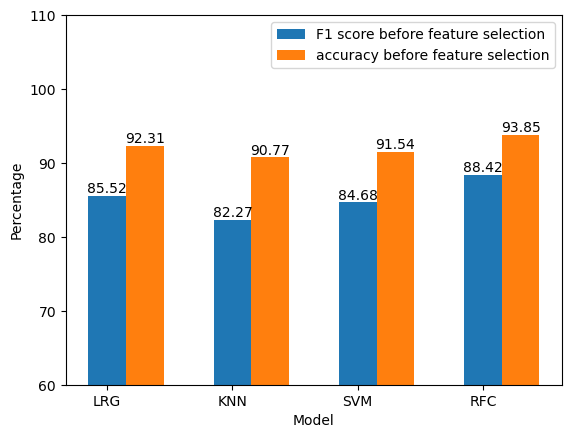

In [36]:
compareplot(f1_all,acc_all,
            "F1 score before feature selection",
            "accuracy before feature selection")

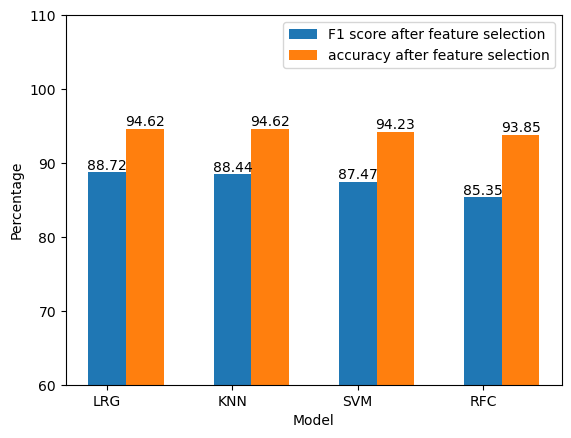

In [37]:
compareplot(f1_all_fs,acc_all_fs,
            "F1 score after feature selection",
            "accuracy after feature selection")

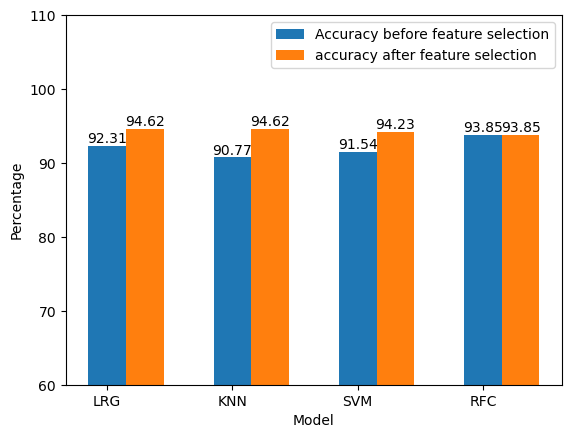

In [38]:
compareplot(acc_all,acc_all_fs,
            "Accuracy before feature selection",
            "accuracy after feature selection")

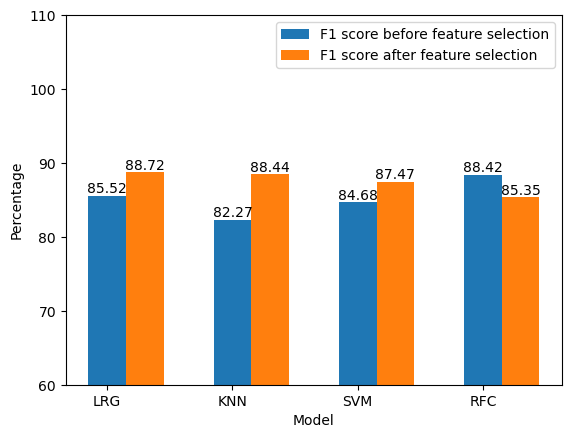

In [39]:
compareplot(f1_all,f1_all_fs,
            "F1 score before feature selection",
            "F1 score after feature selection")